In [1]:
#imports
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
%matplotlib inline

from __future__ import division

In [2]:
#Importer la frame

path = '../data/merge.csv'
df = pd.read_csv(path)

#Traiter la frame

del df['Unnamed: 0']

#Pour plus de simplicité dans le traitement des codes de département, on rassemble la Corse en un code (20)
df.dep = df.dep.apply(lambda x: x.replace('2A', '20').replace('2B', '20'))

#ligne aberrante à supprimer
df = df[df.l_EG != 198.67]

In [3]:
#on stocke les variables d'entrée dans X et de sortie dans y. yc indique le groupe ayant le score de législatives le + élevé
#p_win stocke le groupe politique ayant eu le score de présidentielle le plus élevé dans le département
X = df[df.columns[:-6]]
p_win = df[df.columns[-12:-6]].idxmax(axis=1)
y = df[df.columns[-6:]]
yc = y.idxmax(axis=1)

In [4]:
#stock dans des cols plutôt ?
df['p_win'] = p_win
df['l_win'] = yc

In [5]:
groups = ['EG', 'G', 'autre', 'C', 'D', 'ED']
color = ['#ca0020', '#f4a582', '#b2abd2', '#fee8c8', '#92c5de', '#0571b0']

In [6]:
lgroups = ['l_%s' % g for g in groups]

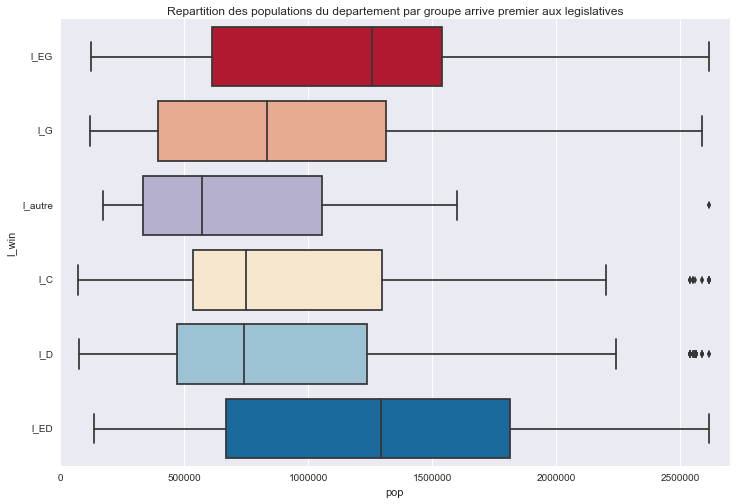

In [22]:
#on commence par des boxplots indiquant quel groupe politique remporte le plus de voix dans les départements peuplés.

#méthode 1 : répartition des populations du département dans lequel se situe la circonscription pour chaque groupe politique
#arrivé premier

plt.figure(figsize=(12,8))
sns.boxplot(df['pop'], df['l_win'], order=lgroups, palette=color)
plt.xlim(0,2700000)
plt.title('Repartition des populations du departement par groupe arrive premier aux legislatives')
plt.savefig('./plots/pop_du_dep.png')
plt.show()

L'extrême-droite semble plus forte dans les départements dont la population est élevée. 

Mais on pourrait utiliser une deuxième méthode pour analyser la répartition des populations du département par groupe politique vainqueur : déduire par moyenne des scores de circonscription un score de département.

In [8]:
#2e méthode

#on groupe par année et par dep
gbyd = df.groupby(['year', 'dep'])
gbydm = gbyd[['pop'] + lgroups].mean() #la pop est moyennée mais ne changera pas si tout se passe bien...

In [9]:
gbydm.head()

pop       l_EG        l_G  l_autre        l_C        l_D  \
year   dep                                                                   
1993.0 1     488244.0  19.107500  17.797500      0.0  25.112500  23.250000   
       10    291359.0  16.486667  15.973333      0.0  17.716667  33.560000   
       11    301693.0  23.176667  28.386667      0.0  11.333333  24.256667   
       12    267728.0  24.673333   4.620000      0.0  39.220000  20.713333   
       13   1788025.0  28.705625  15.016250      0.0  20.075625  13.411875   

                 l_ED  
year   dep             
1993.0 1    14.735000  
       10   13.930000  
       11   11.703333  
       12    3.763333  
       13   21.837500

In [10]:
#une colonne pour stocker le "gagnant du département cette année-là"
gbydm['l_win'] = gbydm[lgroups].idxmax(axis=1)

In [11]:
gbydm.head()

pop       l_EG        l_G  l_autre        l_C        l_D  \
year   dep                                                                   
1993.0 1     488244.0  19.107500  17.797500      0.0  25.112500  23.250000   
       10    291359.0  16.486667  15.973333      0.0  17.716667  33.560000   
       11    301693.0  23.176667  28.386667      0.0  11.333333  24.256667   
       12    267728.0  24.673333   4.620000      0.0  39.220000  20.713333   
       13   1788025.0  28.705625  15.016250      0.0  20.075625  13.411875   

                 l_ED l_win  
year   dep                   
1993.0 1    14.735000   l_C  
       10   13.930000   l_D  
       11   11.703333   l_G  
       12    3.763333   l_C  
       13   21.837500  l_EG

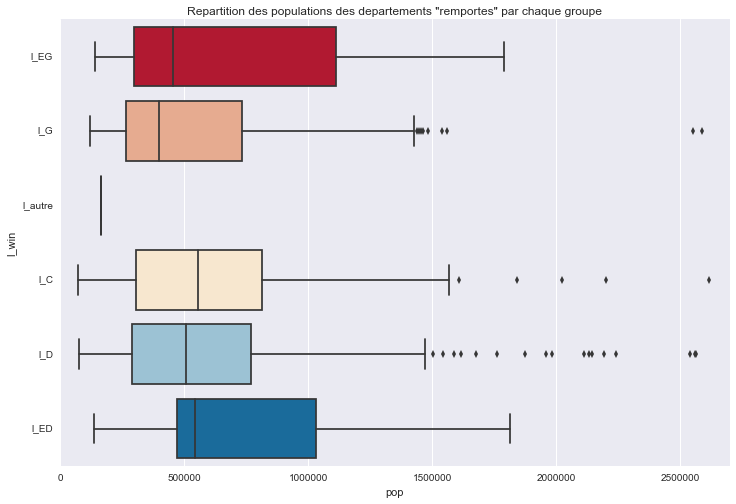

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(gbydm['pop'], gbydm['l_win'], order=lgroups, palette=color)
plt.xlim(0, 2700000)
plt.title('Repartition des populations des departements "remportes" par chaque groupe')
plt.savefig('./plots/pop_des_dep_remportes.png')
plt.show()

Le même schéma se répète avec cette méthode. Finalement, on peut dire que l'extrême-droite a plus de chances de "remporter" une circonscription dans un département dont la population est élevée.
Il semble également que l'extrême-gauche ait plus de chances de "remporter un département entier" lorsque celui-ci a une population élevée.

Pour aller plus loin dans l'analyse des distributions, on pourrait utiliser des nuages de points.

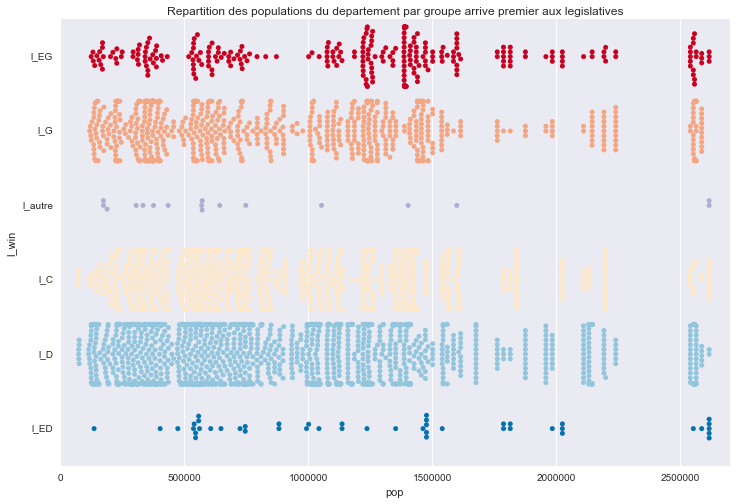

In [20]:
#test avec swarmplot
plt.figure(figsize=(12,8))
sns.swarmplot(df['pop'], df['l_win'], order=lgroups, palette=color)
plt.xlim(0,2700000)
plt.title('Repartition des populations du departement par groupe arrive premier aux legislatives')
plt.savefig('./plots/swarm_pop_du_dep.png')
plt.show()

Finalement, on dirait effectivement que l'extrême-gauche joue presque "à armes égales" avec les groupes gauche, centre et droite lorsque la population du département est élevée.

In [26]:
#Le groupe tout à droite du plot correspond au Nord.
df[df['pop'] > 2500000].dep.unique()

array(['59'], dtype=object)

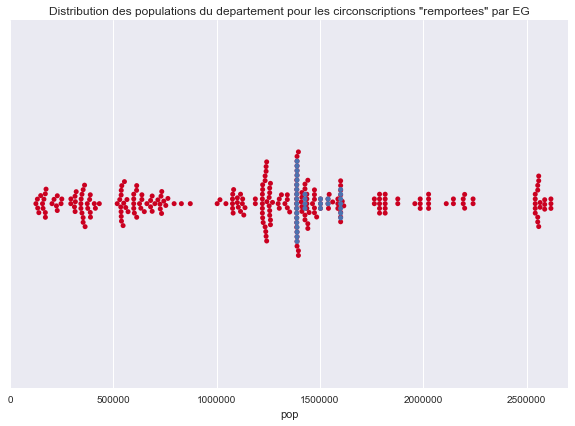

In [66]:
#La Seine Saint-Denis explique certaines des poches où l'extrême-gauche est plus forte
plt.figure(figsize=(10,6.6))
sns.swarmplot(df[(df.l_win == 'l_EG')]['pop'], palette=[color[0]])
sns.swarmplot(df[(df.l_win == 'l_EG') & (df.dep == '93')]['pop'])
plt.xlim(0, 2700000)
plt.title('Distribution des populations du departement pour les circonscriptions "remportees" par EG')

(0, 10000)

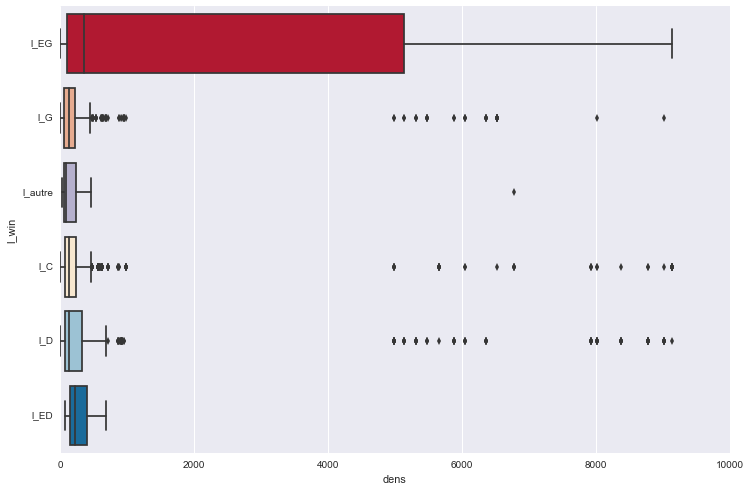

In [71]:
#passons à la densité
plt.figure(figsize=(12,8))
sns.boxplot(df.dens, df.l_win, order=lgroups, palette=color)
plt.xlim(0, 10000)
plt.savefig('./plots/box_dens.png')

(0, 22000)

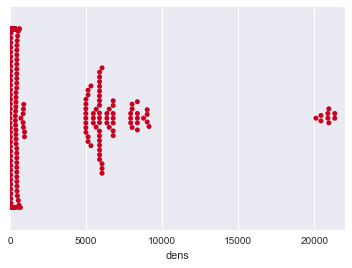

In [80]:
#focus sur EG
sns.swarmplot(df[df.l_win == 'l_EG'].dens, palette=[color[0]])
plt.xlim(0, 22000)

In [82]:
#à droite, Paris.
df[df.dens > 20000].dep.unique()

array(['75'], dtype=object)

In [83]:
#au milieu, sa banlieue
df[(5000 < df.dens) & (df.dens < 10000)].dep.unique()

array(['92', '93', '94'], dtype=object)

C'est donc la région parisienne qui tire la distribution vers le haut. Les autres groupes politiques ne doivent pourtant pas être en reste ?

(0, 22000)

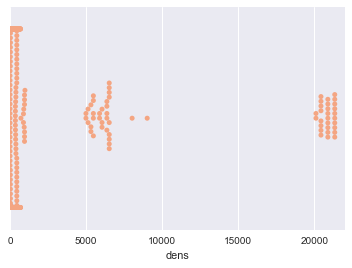

In [85]:
#Exemple avec la G
sns.swarmplot(df[df.l_win == 'l_G'].dens, palette=[color[1]])
plt.xlim(0, 22000)

In [89]:
print "circonscriptions de densité moyenne remportées par D :", len(df[(df.l_win == 'l_D') & (df.dens < 5000)])
print "circonscriptions de densité moyenne remportées par G :", len(df[(df.l_win == 'l_G') & (df.dens < 5000)])
print "circonscriptions de densité moyenne remportées par EG :", len(df[(df.l_win == 'l_EG') & (df.dens < 5000)])

circonscriptions de densité moyenne remportées par D : 1401
circonscriptions de densité moyenne remportées par G : 656
circonscriptions de densité moyenne remportées par EG : 197


In [90]:
print "circonscriptions banlieue parisienne remportées par D :", len(df[(df.l_win == 'l_D') & (5000 <= df.dens) & (df.dens < 10000)])
print "circonscriptions banlieue parisienne remportées par G :", len(df[(df.l_win == 'l_G') & (5000 <= df.dens) & (df.dens < 10000)])
print "circonscriptions banlieue parisienne remportées par EG :", len(df[(df.l_win == 'l_EG') & (5000 <= df.dens) & (df.dens < 10000)])

circonscriptions banlieue parisienne remportées par D : 72
circonscriptions banlieue parisienne remportées par G : 31
circonscriptions banlieue parisienne remportées par EG : 61


In [91]:
print "circonscriptions Paris remportées par D :", len(df[(df.l_win == 'l_D') & (20000 <= df.dens)])
print "circonscriptions Paris remportées par G :", len(df[(df.l_win == 'l_G') & (20000 <= df.dens)])
print "circonscriptions Paris remportées par EG :", len(df[(df.l_win == 'l_EG') & (20000 <= df.dens)])

circonscriptions Paris remportées par D : 57
circonscriptions Paris remportées par G : 29
circonscriptions Paris remportées par EG : 9


Finalement cette répartition des densités exprime la grande force de l'extrême-gauche dans la banlieue parisienne. La densité de population, comme la population seront donc deux variables explicatives qui aideront le modèle à identifier des situations où l'extrême-gauche est en meilleure posture que d'habitude, notamment dans le Nord et dans la banlieue parisienne. Mais traitée correctement, la variable catégorielle dep doit pouvoir apporter les mêmes informations au modèle.